In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("../data/FuelConsumptionCo2.csv")
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


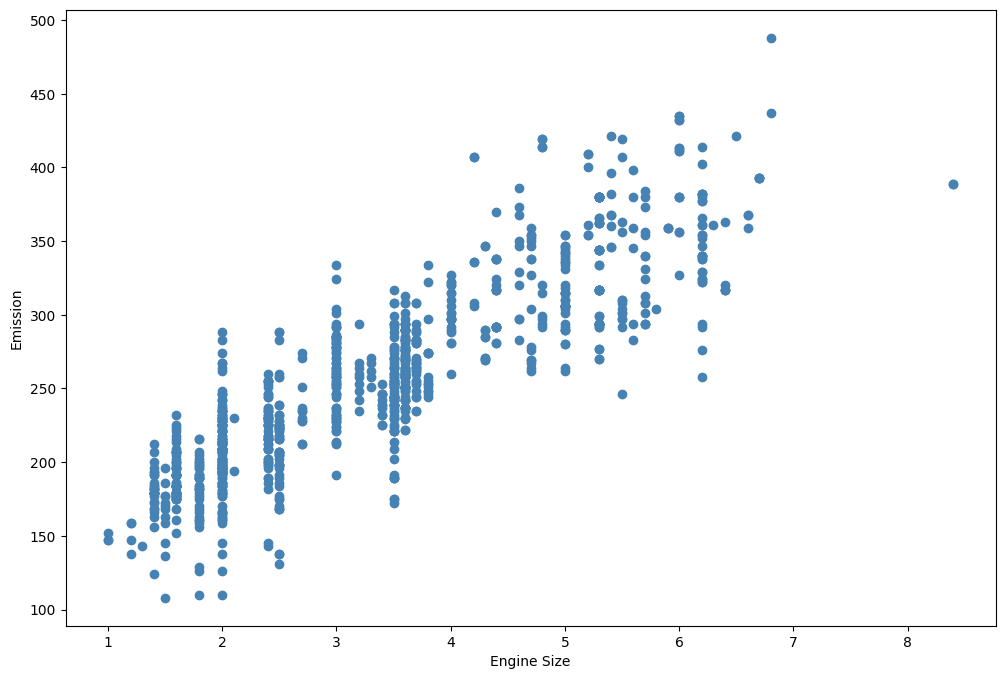

In [3]:
plt.rcParams['figure.figsize'] = (12,8)

plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='steelblue')
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.show()

In [4]:
# Creating train and test dataset
# msk = np.random.rand(len(df)) < 0.8 yerine model_selection.train_test_split kullanılabilir

from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2)

- In polynomial regression, the relationship between the independent variable x and the dependent variable y is modeled as nth degree polynomial in x.

2nd degree:
y = b + θ1 x + θ2 x^2

b = θ0

For example, the original feature set has only one feature: ENGINSIZE

If we select the segree of the polynomial to be 2:

It generates 3 features: degree=0, degree=1, degree=2

1, x and x^2

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

# train_x = np.asanyarray(train[['ENGINESIZE']])
# train_y = np.asanyarray(train[['CO2EMISSIONS']])
# test_x = np.asanyarray(test[['ENGINESIZE']])
# test_y = np.asanyarray(test[['CO2EMISSIONS']])

train_x = train[['ENGINESIZE']].values
train_y = train[['CO2EMISSIONS']].values

test_x = test[['ENGINESIZE']].values
test_y = test[['CO2EMISSIONS']].values

poly = PolynomialFeatures(degree=2)

In [6]:
train_x_poly = poly.fit_transform(train_x)

print(train_x_poly)

[[ 1.    2.5   6.25]
 [ 1.    5.6  31.36]
 [ 1.    3.7  13.69]
 ...
 [ 1.    4.7  22.09]
 [ 1.    4.3  18.49]
 [ 1.    5.2  27.04]]


- Transformed data looks like features sets of multiple linear regression analysis.

2nd degree quation would be turn into:
y = θ0 + θ1 x1 + θ2 x2

- Polynomial regression is a special case of linear regression, with selection your features.

In [7]:
from sklearn import linear_model

clf = linear_model.LinearRegression()

In [9]:
train_y = clf.fit(train_x_poly, train_y)

# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.         49.24462392 -1.29455238]]
Intercept:  [108.38959304]


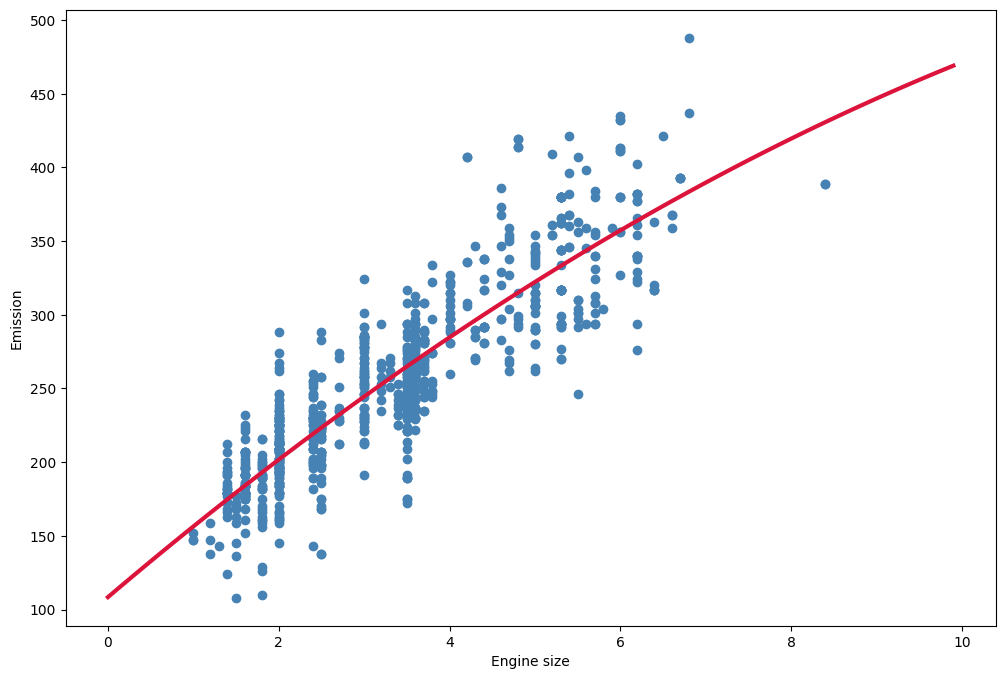

In [17]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='steelblue')
XX = np.arange(0.0, 10.0, 0.1) # line eğimi belirlenerek kör bir şekilde çizgi çizilir
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, 'crimson', linewidth=3)
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [19]:
print(XX)
print(yy)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1
 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9
 9.  9.1 9.2 9.3 9.4 9.5 9.6 9.7 9.8 9.9]
[108.38959304 113.30110991 118.18673573 123.0464705  127.88031422
 132.6882669  137.47032853 142.22649911 146.95677865 151.66116713
 156.33966457 160.99227096 165.6189863  170.2198106  174.79474385
 179.34378605 183.8669372  188.36419731 192.83556636 197.28104437
 201.70063133 206.09432725 210.46213212 214.80404593 219.12006871
 223.41020043 227.6744411  231.91279073 236.12524931 240.31181685
 244.47249333 248.60727877 252.71617316 256.7991765  260.85628879
 264.88751004 268.89284024 272.87227939 276.82582749 280.75348455
 284.65525056 288.53112552 292.38110943 296.2052023  300.00340411

# Evaluation
- Mean Absolute Error (MAE)
- 

In [23]:
# Evaluation
# Mean Absolute Error (MAE) 

from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
# print(train_x_poly)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("RMSE: %.2f" % np.sqrt(np.mean((test_y_ - test_y) ** 2)))
print("R2-score: %.2f" % r2_score(test_y_ , test_y))

Mean absolute error: 24.99
Residual sum of squares (MSE): 1058.84
RMSE: 32.54
R2-score: 0.66
